# Cybersecurity Analytics: Identifying Unusual Login Patterns

In [3]:
!pip install pandas numpy matplotlib scikit-learn seaborn joblib

  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.4.1-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using 

In [21]:
import pandas as pd
import random
from datetime import datetime, timedelta

users = [f"U{100+i}" for i in range(1, 31)]
countries = ["India", "USA", "Russia", "China", "Nigeria", "Germany", "UK", "Thailand"]

cities = {
    "India": ["Bangalore", "Hyderabad", "Chennai", "Pune"],
    "USA": ["New York", "Texas"],
    "Russia": ["Moscow"],
    "China": ["Beijing"],
    "Nigeria": ["Lagos"],
    "Germany": ["Berlin"],
    "UK": ["London"],
    "Thailand": ["Bangkok"]
}

devices = ["Laptop", "Mobile"]

data = []
base_date = datetime(2025, 1, 1)

for _ in range(500):
    user = random.choice(users)
    country = random.choice(countries)
    city = random.choice(cities[country])

    login_time = base_date + timedelta(
        days=random.randint(0, 30),
        hours=random.randint(0, 23),
        minutes=random.randint(0, 59)
    )
    logout_time = login_time + timedelta(minutes=random.randint(5, 600))

    failed_attempts = random.choice([0, 0, 1, 2, 3, 4, 5, 6])
    login_status = "Failed" if failed_attempts >= 3 else "Success"

    data.append([
        user,
        login_time.strftime("%Y-%m-%d %H:%M"),
        logout_time.strftime("%Y-%m-%d %H:%M"),
        f"{random.randint(10,255)}.{random.randint(0,255)}.{random.randint(0,255)}.{random.randint(0,255)}",
        country,
        city,
        login_status,
        random.choice(devices),
        failed_attempts
    ])

df = pd.DataFrame(data, columns=[
    "user_id",
    "login_time",
    "logout_time",
    "ip_address",
    "country",
    "city",
    "login_status",
    "device_type",
    "failed_attempts"
])

df.to_csv("cybersecurity_intrusion_data.csv", index=False)

print("CSV file created records")


CSV file created records


In [29]:
df = pd.read_csv("../src/cybersecurity_intrusion_data.csv")
df.head()


,user_id,login_time,logout_time,ip_address,country,city,login_status,device_type,failed_attempts
0,U116,2025-01-15 07:05,2025-01-15 12:47,43.243.137.113,Germany,Berlin,Failed,Mobile,6
1,U110,2025-01-05 18:25,2025-01-06 01:06,129.198.106.38,UK,London,Success,Laptop,0
2,U104,2025-01-19 21:40,2025-01-20 01:14,233.111.242.60,Germany,Berlin,Success,Laptop,2
3,U102,2025-01-12 07:08,2025-01-12 15:28,24.18.37.105,UK,London,Success,Mobile,0
4,U117,2025-01-14 06:17,2025-01-14 15:52,32.42.104.35,Germany,Berlin,Failed,Mobile,3


In [23]:
df.describe()

,failed_attempts
count,500.000000
mean,2.464000
std,2.060387
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,6.000000


In [24]:
df.isnull().sum()

user_id            0
login_time         0
logout_time        0
ip_address         0
country            0
city               0
login_status       0
device_type        0
failed_attempts    0
dtype: int64

In [25]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   user_id          500 non-null    str  
 1   login_time       500 non-null    str  
 2   logout_time      500 non-null    str  
 3   ip_address       500 non-null    str  
 4   country          500 non-null    str  
 5   city             500 non-null    str  
 6   login_status     500 non-null    str  
 7   device_type      500 non-null    str  
 8   failed_attempts  500 non-null    int64
dtypes: int64(1), str(8)
memory usage: 35.3 KB


In [26]:
df.count

<bound method DataFrame.count of     user_id        login_time       logout_time       ip_address  country  \
0      U116  2025-01-15 07:05  2025-01-15 12:47   43.243.137.113  Germany   
1      U110  2025-01-05 18:25  2025-01-06 01:06   129.198.106.38       UK   
2      U104  2025-01-19 21:40  2025-01-20 01:14   233.111.242.60  Germany   
3      U102  2025-01-12 07:08  2025-01-12 15:28     24.18.37.105       UK   
4      U117  2025-01-14 06:17  2025-01-14 15:52     32.42.104.35  Germany   
..      ...               ...               ...              ...      ...   
495    U112  2025-01-24 10:06  2025-01-24 12:51      24.87.8.101       UK   
496    U123  2025-01-29 12:05  2025-01-29 21:44  165.235.114.111    China   
497    U103  2025-01-02 15:20  2025-01-02 20:21  176.190.224.196  Nigeria   
498    U102  2025-01-24 09:56  2025-01-24 11:33   62.135.224.242       UK   
499    U113  2025-01-04 07:39  2025-01-04 07:57    31.158.89.108       UK   

        city login_status device_type  fai

In [27]:
df.shape

(500, 9)

In [30]:
df['login_time'] = pd.to_datetime(df['login_time'])
df['logout_time'] = pd.to_datetime(df['logout_time'])

df['access_duration'] = (df['logout_time'] - df['login_time']).dt.total_seconds() / 60


### Feature Engineering

In [31]:
df['login_hour'] = df['login_time'].dt.hour

df['odd_hour_login'] = df['login_hour'].apply(
    lambda x: 1 if x < 6 else 0
)


### EDA

In [32]:
foreign_logins = df[df['country'] != 'India']
foreign_logins['user_id'].value_counts()


user_id
U107    22
U112    22
U123    21
U115    20
U118    20
U114    19
U129    19
U110    16
U102    16
U111    16
U128    16
U130    16
U113    15
U120    15
U124    15
U105    15
U116    14
U127    14
U103    14
U122    14
U108    13
U126    13
U101    13
U109    13
U104    12
U125    12
U106    11
U121    10
U117     9
U119     8
Name: count, dtype: int64

In [33]:
df[df['odd_hour_login'] == 1]


,user_id,login_time,logout_time,ip_address,country,city,login_status,device_type,failed_attempts,access_duration,login_hour,odd_hour_login
5,U108,2025-01-20 00:51:00,2025-01-20 08:25:00,141.243.81.183,Russia,Moscow,Success,Laptop,2,454.0,0,1
12,U127,2025-01-05 02:28:00,2025-01-05 06:47:00,116.177.5.29,Nigeria,Lagos,Failed,Laptop,3,259.0,2,1
17,U104,2025-01-09 03:25:00,2025-01-09 07:42:00,227.86.155.170,UK,London,Failed,Laptop,3,257.0,3,1
18,U108,2025-01-17 03:41:00,2025-01-17 07:34:00,247.147.12.34,China,Beijing,Failed,Laptop,3,233.0,3,1
20,U111,2025-01-06 02:39:00,2025-01-06 03:28:00,247.192.178.141,Russia,Moscow,Success,Laptop,0,49.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,U103,2025-01-20 00:35:00,2025-01-20 01:27:00,119.114.204.217,China,Beijing,Success,Mobile,0,52.0,0,1
481,U102,2025-01-25 05:37:00,2025-01-25 05:46:00,240.80.214.136,India,Pune,Success,Laptop,2,9.0,5,1
482,U110,2025-01-07 01:34:00,2025-01-07 02:13:00,12.94.214.251,Russia,Moscow,Success,Laptop,0,39.0,1,1
483,U123,2025-01-10 05:31:00,2025-01-10 14:10:00,148.182.156.16,China,Beijing,Success,Mobile,0,519.0,5,1


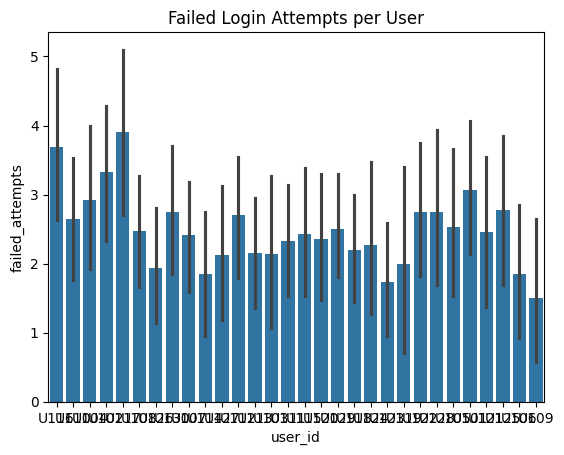

In [34]:
sns.barplot(x='user_id', y='failed_attempts', data=df)
plt.title("Failed Login Attempts per User")
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [36]:
features = df[['failed_attempts', 'access_duration', 'odd_hour_login']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [37]:
model = LinearRegression()
model.fit(X_scaled, df['failed_attempts'])


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [38]:
df['anomaly_score'] = abs(
    df['failed_attempts'] - model.predict(X_scaled)
)

df.sort_values(by='anomaly_score', ascending=False).head()


,user_id,login_time,logout_time,ip_address,country,city,login_status,device_type,failed_attempts,access_duration,login_hour,odd_hour_login,anomaly_score
498,U102,2025-01-24 09:56:00,2025-01-24 11:33:00,62.135.224.242,UK,London,Failed,Laptop,6,97.0,9,0,3.552714e-15
0,U116,2025-01-15 07:05:00,2025-01-15 12:47:00,43.243.137.113,Germany,Berlin,Failed,Mobile,6,342.0,7,0,3.552714e-15
482,U110,2025-01-07 01:34:00,2025-01-07 02:13:00,12.94.214.251,Russia,Moscow,Success,Laptop,0,39.0,1,1,3.552714e-15
480,U104,2025-01-21 19:43:00,2025-01-22 00:09:00,186.216.220.223,Thailand,Bangkok,Failed,Laptop,5,266.0,19,0,3.552714e-15
476,U114,2025-01-10 21:59:00,2025-01-10 23:12:00,13.104.231.127,Nigeria,Lagos,Failed,Mobile,6,73.0,21,0,3.552714e-15


In [39]:
#r2_score
from sklearn.metrics import r2_score
r2 = r2_score(df['failed_attempts'], model.predict(X_scaled))
print(f"R² Score of the model: {r2}")

R² Score of the model: 1.0


In [42]:
#save the model
import joblib
joblib.dump(model, '../model/cybersecurity_login_model.pkl')

['../model/cybersecurity_login_model.pkl']